In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import mediapipe as mp
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Do not work with this
# import cv2
# import mediapipe as mp
# import numpy as np
# import os

# # Initialize Mediapipe Hand module
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
# # Function to detect hand using Mediapipe Hand module and create skeleton frame with a triangular palm
# def detect_hand(frame):
#     # Convert BGR image to RGB
#     rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
#     # Process frame with Mediapipe Hand module
#     results = hands.process(rgb_frame)
    
#     # Create white background frame
#     white_frame = np.ones_like(frame) * 255
    
#     if results.multi_hand_landmarks:
#         for hand_landmarks in results.multi_hand_landmarks:  # Loop through all detected hands
#             pts = []
#             for landmark in hand_landmarks.landmark:
#                 # Get landmark position
#                 x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
#                 pts.append((x, y))

#             # Draw fingers
#             finger_connections = [(0, 1), (1, 2), (2, 3), (3, 4), 
#                                   (5, 6), (6, 7), (7, 8), 
#                                   (9, 10), (10, 11), (11, 12), 
#                                   (13, 14), (14, 15), (15, 16), 
#                                   (17, 18), (18, 19), (19, 20)]

#             for connection in finger_connections:
#                 idx1, idx2 = connection
#                 cv2.line(white_frame, pts[idx1], pts[idx2], (0, 255, 0), 3)

#             # Draw palm
#             palm_connections = [(0, 17), (17, 5), (5, 0), (0, 9), (9, 13), (13, 17)]  # Creating a more realistic palm representation
#             for connection in palm_connections:
#                 idx1, idx2 = connection
#                 cv2.line(white_frame, pts[idx1], pts[idx2], (0, 255, 0), 3)

#             # Optionally, draw the landmarks
#             for idx, point in enumerate(pts):
#                 cv2.circle(white_frame, point, 1, (0, 0, 255), 1)

#     return frame, white_frame



# # Function to save skeleton image in corresponding folder
# def save_skeleton_image(letter_folder, skeleton_frame, counter):
#     # Check if letter folder exists, if not create it
#     if not os.path.exists(letter_folder):
#         os.makedirs(letter_folder)
    
#     # Save skeleton image in letter folder
#     cv2.imwrite(os.path.join(letter_folder, f'skeleton_{counter}.png'), skeleton_frame)

# # Main function
# def main():
#     # Open webcam
#     cap = cv2.VideoCapture(0)
    
#     # Counter to keep track of saved images
#     counter = 0
    
#     while True:
#         ret, frame = cap.read()
        
#         if not ret:
#             break
        
#         # Detect hand and create skeleton frame
#         original_frame, skeleton_frame = detect_hand(frame)
        
#         # Display frames
#         cv2.imshow('Original Frame', original_frame)
#         cv2.imshow('Skeleton Frame', skeleton_frame)
        
#         # Save skeleton image on designated folder when 'a' key is pressed
#         key = cv2.waitKey(1)
#         if key == ord('a'):
#             save_skeleton_image('new_letters/test', skeleton_frame, counter)
#             counter += 1
        
#         # Exit on 'q' press
#         if key == ord('q'):
#             break
    
#     # Release webcam and close all windows
#     cap.release()
#     cv2.destroyAllWindows()

# if __name__ == "__main__":
#     main()


In [32]:

# Initialize Mediapipe Hand module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Function to detect hand using Mediapipe Hand module and create skeleton frame
def detect_hand(frame):
    # Convert BGR image to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Process frame with Mediapipe Hand module
    results = hands.process(rgb_frame)
    
    # Create white background frame
    white_frame = np.ones_like(frame) * 255
    
    # Draw hand landmarks and connections on original frame
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw landmarks
            for landmark in hand_landmarks.landmark:
                # Get landmark position
                x, y = int(landmark.x * frame.shape[1]), int(landmark.y * frame.shape[0])
                
                # Draw landmark on original frame
                cv2.circle(frame, (x, y), 4, (0, 0, 255), -1)
            
            # Draw connections between landmarks on original frame
            connections = mp_hands.HAND_CONNECTIONS
            for connection in connections:
                idx1, idx2 = connection
                x1, y1 = int(hand_landmarks.landmark[idx1].x * frame.shape[1]), int(hand_landmarks.landmark[idx1].y * frame.shape[0])
                x2, y2 = int(hand_landmarks.landmark[idx2].x * frame.shape[1]), int(hand_landmarks.landmark[idx2].y * frame.shape[0])
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    #Draw it on a white background frame
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # First draw all connections with green lines
            connections = mp_hands.HAND_CONNECTIONS
            for connection in connections:
                start_idx, end_idx = connection
                start_landmark = hand_landmarks.landmark[start_idx]
                end_landmark = hand_landmarks.landmark[end_idx]
                start_point = (int(start_landmark.x * white_frame.shape[1]), int(start_landmark.y * white_frame.shape[0]))
                end_point = (int(end_landmark.x * white_frame.shape[1]), int(end_landmark.y * white_frame.shape[0]))
                cv2.line(white_frame, start_point, end_point, (0, 255, 0), 2)

            # Then draw all landmarks with red outline circles on top of the green lines
            for landmark in hand_landmarks.landmark:
                # Get landmark position
                x, y = int(landmark.x * white_frame.shape[1]), int(landmark.y * white_frame.shape[0])

                # Draw landmark as a small red circle (outline only) on top of green lines
                cv2.circle(white_frame, (x, y), 1, (0, 0, 255), 1)  # Increase the thickness as needed

    return frame, white_frame

# Function to save skeleton image in corresponding folder
def save_skeleton_image(letter_folder, skeleton_frame, counter):
    # Check if letter folder exists, if not create it
    if not os.path.exists(letter_folder):
        os.makedirs(letter_folder)
    
    # Save skeleton image in letter folder
    cv2.imwrite(os.path.join(letter_folder, f'skeleton_{counter}.png'), skeleton_frame)

# Main function
# This function opens up the camera and detects the hand landmarks
# on pressing button 'a' the current is framed on the designated file path
def main():
    # Open webcam
    cap = cv2.VideoCapture(0)
    
    # Counter to keep track of saved images
    counter = 0
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Detect hand and create skeleton frame
        original_frame, skeleton_frame = detect_hand(frame)
        
        # Display frames
        cv2.imshow('Original Frame', original_frame)
        cv2.imshow('Skeleton Frame', skeleton_frame)
        
        # Save skeleton image on designated folder when 'a' key is pressed
        key = cv2.waitKey(1)
        if key == ord('a'):
            save_skeleton_image('letters/A', skeleton_frame, counter)
            counter += 1
        
        # Exit on 'q' press
        if key == ord('q'):
            break
    
    # Release webcam and close all windows
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


In [53]:
label = ord('A') - ord('a')

In [54]:
label

-32

# Building The Model

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os

# Define paths
base_train_path = 'AtoZ'
train_path = os.path.join(base_train_path)
base_validation_path="letters"

# Define parameters
img_height, img_width = 224, 224
batch_size = 32
num_classes = 26  # A to Z

train_datagen = ImageDataGenerator(
    rescale=1.0/255,            # Normalize pixel values to [0, 1]
    rotation_range=25,          # alter rotation angles slightly
    width_shift_range=0.2,      # Slightly reduce shift ranges to avoid cutting off important features
    height_shift_range=0.2,     # Same as width shift range
    shear_range=0.2,            # change shear slightly to minimize distortion
    zoom_range=0.2,             # Subtle zooming to maintain important gesture details
    fill_mode='nearest',        # Use 'nearest' to fill in new pixels during transformations
    validation_split=0.2        # Split data into training and validation sets
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load pre-trained MobileNetV2 model and fine-tune
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable=False

# Create a new model on top of the pre-trained base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),  # Batch Normalization layer added
    Dropout(0.5),  # droppout layer
    Dense(num_classes, activation='softmax',kernel_regularizer=l2(0.01)) 
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

#save model
model.save_weights('asl_cnn_model_final_weight.weights.h5')
model.save("asl_cnn_model_final.keras")





Found 3746 images belonging to 26 classes.
Found 935 images belonging to 26 classes.
Epoch 1/20


C:\Users\ghema\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


118/118 ━━━━━━━━━━━━━━━━━━━━ 111s 872ms/step - accuracy: 0.3651 - loss: 2.8532 - val_accuracy: 0.8203 - val_loss: 1.3485
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 100s 835ms/step - accuracy: 0.8065 - loss: 1.0387 - val_accuracy: 0.9230 - val_loss: 0.8176
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 104s 868ms/step - accuracy: 0.8689 - loss: 0.8165 - val_accuracy: 0.9433 - val_loss: 0.6284
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 101s 842ms/step - accuracy: 0.8956 - loss: 0.6848 - val_accuracy: 0.9604 - val_loss: 0.5224
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 102s 854ms/step - accuracy: 0.9203 - loss: 0.5987 - val_accuracy: 0.9690 - val_loss: 0.4502
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 99s 820ms/step - accuracy: 0.9168 - loss: 0.5635 - val_accuracy: 0.9615 - val_loss: 0.4328
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 99s 821ms/step - accuracy: 0.9424 - loss: 0.4876 - val_accuracy: 0.9658 - val_loss: 0.3935
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 100s 836ms/step - accuracy: 0.9285 - loss: 0.4804

In [28]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 26)                  │          33,306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,368,144 (9.03 MB)

 Trainable params: 35,866 (140.10 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

 Optimizer params: 71,734 (280.21 KB)

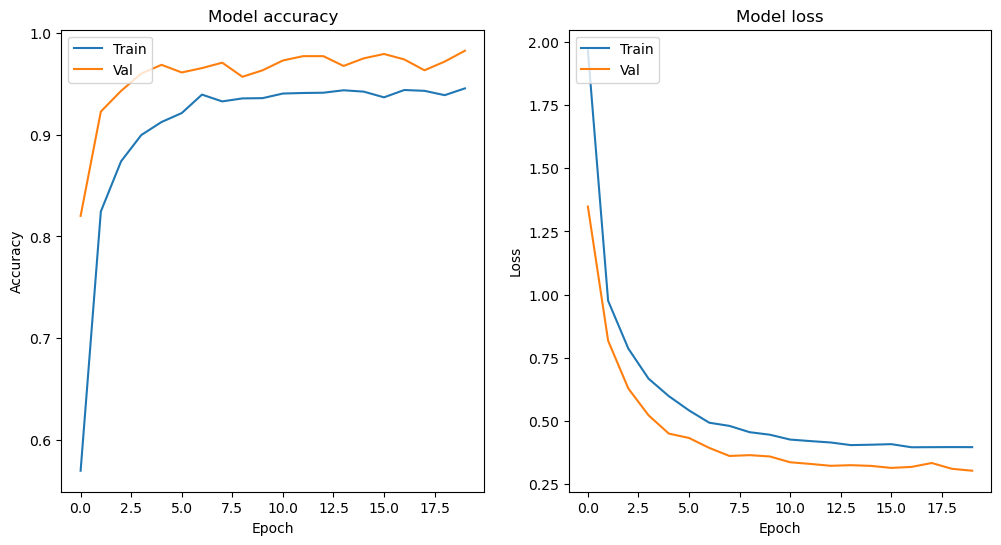

In [29]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 680ms/step


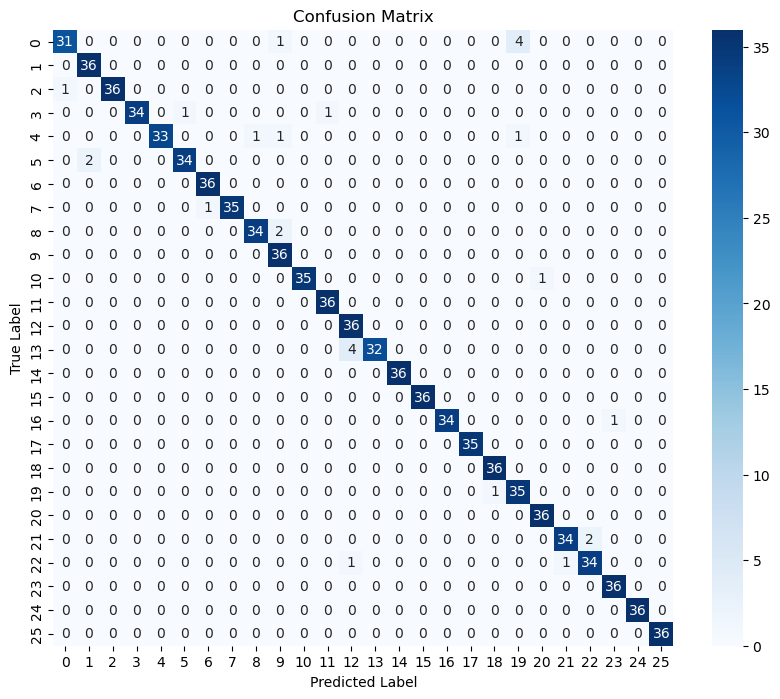

              precision    recall  f1-score   support

           0       0.97      0.86      0.91        36
           1       0.95      1.00      0.97        36
           2       1.00      0.97      0.99        37
           3       1.00      0.94      0.97        36
           4       1.00      0.92      0.96        36
           5       0.97      0.94      0.96        36
           6       0.97      1.00      0.99        36
           7       1.00      0.97      0.99        36
           8       0.97      0.94      0.96        36
           9       0.90      1.00      0.95        36
          10       1.00      0.97      0.99        36
          11       0.97      1.00      0.99        36
          12       0.88      1.00      0.94        36
          13       1.00      0.89      0.94        36
          14       1.00      1.00      1.00        36
          15       1.00      1.00      1.00        36
          16       1.00      0.97      0.99        35
          17       1.00    

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reset the validation generator and make predictions
validation_generator.reset()  # Resetting the generator is important before making predictions
predictions = model.predict(validation_generator, steps=len(validation_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get the true labels
# You have to extract the labels from the generator
true_classes = validation_generator.classes

# Assuming you have only one image per batch in the validation generator
# If batch size > 1, then extract labels accordingly
# true_labels = np.concatenate([np.argmax(batch[1], axis=1) for batch in validation_generator], axis=0)

# Step 3: Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Optional: Print classification report
print(classification_report(true_classes, predicted_classes))